# Import

In [1]:
import pandas as pd
import os
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [4]:
data = os.path.join('data', 'bank.csv')
bank_df = pd.read_csv(data)

# Methods/Globals/Constants

# Feature Extraction

In [4]:
feature_extraction_df = bank_df.copy()

In [5]:
feature_extraction_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [6]:
feature_extraction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

In [7]:
feature_extraction_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,100000.0,1.176045e+07,3.178394e+07,10802.0,179652.0000,312246.0,5.249420e+05,1.000000e+08
Credit Score,80846.0,1.076456e+03,1.475404e+03,585.0,705.0000,724.0,7.410000e+02,7.510000e+03
Annual Income,80846.0,1.378277e+06,1.081360e+06,76627.0,848844.0000,1174162.0,1.650663e+06,1.655574e+08
Monthly Debt,100000.0,1.847241e+04,1.217499e+04,0.0,10214.1625,16220.3,2.401206e+04,4.358433e+05
Years of Credit History,100000.0,1.819914e+01,7.015324e+00,3.6,13.5000,16.9,2.170000e+01,7.050000e+01
Months since last delinquent,46859.0,3.490132e+01,2.199783e+01,0.0,16.0000,32.0,5.100000e+01,1.760000e+02
Number of Open Accounts,100000.0,1.112853e+01,5.009870e+00,0.0,8.0000,10.0,1.400000e+01,7.600000e+01
Number of Credit Problems,100000.0,1.683100e-01,4.827050e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01
Current Credit Balance,100000.0,2.946374e+05,3.761709e+05,0.0,112670.0000,209817.0,3.679588e+05,3.287897e+07
Maximum Open Credit,99998.0,7.607984e+05,8.384503e+06,0.0,273438.0000,467874.0,7.829580e+05,1.539738e+09


# Interactions

Take the most highely correlated feature and create interactions between them.
    - Number of Credit Problems & Tax Liens
    - Number of Credit Problems & Bankruptcies
    - Monthly Debt & Current Credit Balance
    - Monthly Debt & Current Credit Balance

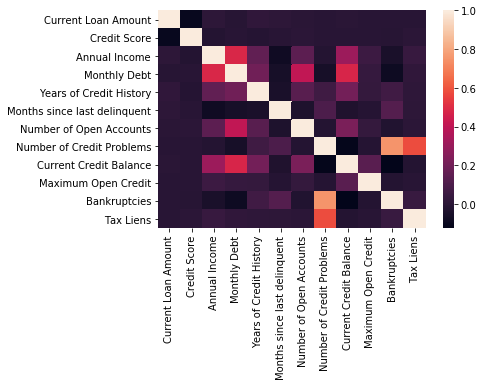

In [8]:
sns.heatmap(feature_extraction_df.corr());

In [9]:
feature_extraction_df['Number of Credit Problems [IN] Tax Liens'] = feature_extraction_df['Number of Credit Problems'] * feature_extraction_df['Tax Liens']
feature_extraction_df['Number of Credit Problems [IN] Bankruptcies'] = feature_extraction_df['Number of Credit Problems'] * feature_extraction_df['Bankruptcies']

feature_extraction_df['Monthly Debt [IN] Current Credit Balance'] = feature_extraction_df['Monthly Debt'] * feature_extraction_df['Current Credit Balance']
feature_extraction_df['Monthly Debt [IN] Current Credit Balance'] = feature_extraction_df['Monthly Debt'] * feature_extraction_df['Number of Open Accounts']

# Aggregations

Call aggregation methods on some of the catagorical features. get the mean, median, and count with the exception of customer id excluding median.
    - Waiting for EDA and clean datframe to work

In [10]:
"""
This code only
works for a cleaned dataframe
"""

feature_extraction_df = feature_extract_mean_count_median(df=feature_extraction_df, 
                                  columns=['Purpose', 'Home Ownership', 'Term' ], 
                                  target='Credit Score')

feature_extraction_df = feature_extract_mean_count_median(df=feature_extraction_df, 
                                  columns=['Customer ID' ], 
                                  target='Credit Score',
                                  return_trig=[True, True, False]) 

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [nan] of <class 'float'>

In [11]:
feature_extraction_df[feature_extraction_df.columns[4:]].head()

,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Number of Credit Problems [IN] Tax Liens,Number of Credit Problems [IN] Bankruptcies,Monthly Debt [IN] Current Credit Balance
0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,0.0,1.0,31288.44
1,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0.0,0.0,1165359.30
2,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0.0,0.0,525609.54
3,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,0.0,0.0,78677.10
4,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,0.0,0.0,309595.50


In [12]:
test = pd.DataFrame({
    'user_id': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1, 2],
    'order_id': [1,1,1,1,1,1,1,21,21,21,21,21,21,21,21,21,21, 3],
    'con' : [1,1,1,1,3939,111, 1,213,21,241,251,217,218,210,21,11,21, 1]
})